# Sujet 1 - Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Récupération des données et analyse préliminaire

Les données sur la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa sont disponibles sur le site web de l'[institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). La série de données s'étend de 1958 à nos jours. Les données considérées sont les relevés avec une granularité hebdomadaire. Elles sont disponibles à l'adresse suivante:

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"

Pour nous protéger contre une éventuelle disparition ou modification du serveur de l'institut Scripps, nous faisons une copie locale de ce jeux de données que nous préservons avec notre analyse. Il est inutile et même risquée de télécharger les données à chaque exécution, car dans le cas d'une panne nous pourrions remplacer nos données par un fichier défectueux. Pour cette raison, nous téléchargeons les données seulement si la copie locale n'existe pas.

In [3]:
data_file = "CO2_Mauna_Loa_Hebdo.csv"

In [4]:
import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Le jeu de données est téléchargé le 08/10/2020 à 16h30.

Un examen préliminaire des données permet d'en observer la structure.

On note que les 44 premières lignes décrivent le contexte général. Ellent devront donc être supprimées lors de l'extraction des données.

Les lignes 40 à 44 précisent que les unités de concentration de CO2 sont des micro-moles de CO2 par mole (ppm). Ces valeurs sont considérées à 12h00 le samedi de chaque semaine.

On note également que les dates sont au format "AAAA-MM-JJ".

In [5]:
Lignes = []
with open(data_file, "r", encoding='utf-8') as entree:
    for ligne in entree:
        Lignes.append(ligne)
for Cpt in range(60):
    print(Cpt+1, Lignes[Cpt])

1 "-------------------------------------------------------------------------------------------"

2 " Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                "

3 " at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m      "

4 "                                                                                           "

5 " Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   "

6 " Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        "

7 " Scripps Institution of Oceanography (SIO)                                                 "

8 " University of California                                                                  "

9 " La Jolla, California USA 92093-0244                                                       "

10 "                                                                                           "

11 " Status of data and corre

On charge les données à partir de la ligne 45 et on examine leur teneur.

In [6]:
raw_data = pd.read_csv(data_file, skiprows=44, names=['Date', 'CO2'], parse_dates=[0], infer_datetime_format=True)
raw_data.head()

Date     CO2
0 1958-03-29  316.19
1 1958-04-05  317.31
2 1958-04-12  317.69
3 1958-04-19  317.58
4 1958-04-26  316.48

In [7]:
raw_data.tail()

Date     CO2
3185 2020-08-29  411.79
3186 2020-09-05  411.55
3187 2020-09-12  411.45
3188 2020-09-19  411.17
3189 2020-09-26  411.06

In [8]:
date_début = raw_data.loc[raw_data.index.min(), 'Date']
date_fin = raw_data.loc[raw_data.index.max()-1, 'Date']
print(f"On remarque que les données couvrent la période allant du {date_début.strftime('%d/%m/%Y')} au {date_fin.strftime('%d/%m/%Y')}.")

On remarque que les données couvrent la période allant du 29/03/1958 au 19/09/2020.


Nous pouvons vérifier si des données sont manquantes. Il semble que non (pas de valeur nulle).

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, CO2]
Index: []

Manque-t-il des données (des semaines non enregistrées)? Pour cela, nous allons vérifier que l'écart entre deux dates consécutives est bien de 7 jours.

On note que de nombreuses dates sont manquantes. Dans certains cas, ce sont plusieurs semaines qui sont manquantes.

In [10]:
# Calculer les écarts de dates entre deux index contigüs. Si l'écart n'est pas égal à 7 jours, afficher les deux lignes.
for cpt in range (raw_data.index.min(), raw_data.index.max()-1):
    début = raw_data.loc[raw_data.index.min():raw_data.index.max(), 'Date'][cpt]
    fin = raw_data.loc[raw_data.index.min():raw_data.index.max(), 'Date'][cpt+1]
    if str(fin-début) != '7 days 00:00:00':
        print(cpt, ':', début, ' - ', cpt+1, ':', fin, ' - ', fin-début)

5 : 1958-05-03 00:00:00  -  6 : 1958-05-17 00:00:00  -  14 days 00:00:00
7 : 1958-05-24 00:00:00  -  8 : 1958-07-05 00:00:00  -  42 days 00:00:00
14 : 1958-08-16 00:00:00  -  15 : 1958-08-30 00:00:00  -  14 days 00:00:00
16 : 1958-09-06 00:00:00  -  17 : 1958-11-08 00:00:00  -  63 days 00:00:00
29 : 1959-01-31 00:00:00  -  30 : 1959-02-14 00:00:00  -  14 days 00:00:00
33 : 1959-03-07 00:00:00  -  34 : 1959-03-21 00:00:00  -  14 days 00:00:00
43 : 1959-05-23 00:00:00  -  44 : 1959-06-06 00:00:00  -  14 days 00:00:00
53 : 1959-08-08 00:00:00  -  54 : 1959-08-22 00:00:00  -  14 days 00:00:00
210 : 1962-08-18 00:00:00  -  211 : 1962-09-15 00:00:00  -  28 days 00:00:00
225 : 1962-12-22 00:00:00  -  226 : 1963-01-05 00:00:00  -  14 days 00:00:00
231 : 1963-02-09 00:00:00  -  232 : 1963-02-23 00:00:00  -  14 days 00:00:00
241 : 1963-04-27 00:00:00  -  242 : 1963-05-11 00:00:00  -  14 days 00:00:00
269 : 1963-11-16 00:00:00  -  270 : 1963-11-30 00:00:00  -  14 days 00:00:00
277 : 1964-01-18 00

Si nous tentons d'analyser les données et surtout de modéliser leur tendance en les approchant par un polynôme, nous allons obtenir des résultats erronés. En effet, la variable d'entrée du polynôme pour obtenir une évaluation sera la colonne des indice des lignes du tableau. Comme les dates et les indices n'évoluent pas de manière conjointe, les résultats des prévisions en seront affectés.

On se propose donc de créer un data frame avec toutes les semaines depuis le début des mesures, le 29/03/1958, jusqu'à la fin de l'année 2025. Les données déjà disponibles seront alors jointées dans ce data frame. Les nouvelles prévisions seront également ajoutées. Le modèle de prévision de la tendance de long terme pourra alors être ajusté.

## Recontruction d'un jeu de données complété

Création d'un data frame avec toutes les dates depuis le 29/03/1958 jusqu'à la fin de l'année 2025.

In [11]:
tab_date = pd.date_range(start='1958-03-29', end='2026-01-01', periods=None, freq='7D', normalize=False, name=None)
df = pd.DataFrame(tab_date, columns=['Date'])

Pour chaque date, le numéro de la semaine est calculé. Cette colonne est ajoutée au data frame.

In [12]:
tab_week = []

for cpt in range(df.index.min(), df.index.max()+1):
    date = df.loc[df.index.min():df.index.max(), 'Date'][cpt]
    tab_week.append(pd.Period(date, 'D').week)

df = df.assign(Week = tab_week)

Nous allons intégrer les mesures dans ce data frame.

In [13]:
df = df.merge(raw_data, on='Date', how='outer')
df[4:16]

Date  Week     CO2
4  1958-04-26    17  316.48
5  1958-05-03    18  316.95
6  1958-05-10    19     NaN
7  1958-05-17    20  317.56
8  1958-05-24    21  317.99
9  1958-05-31    22     NaN
10 1958-06-07    23     NaN
11 1958-06-14    24     NaN
12 1958-06-21    25     NaN
13 1958-06-28    26     NaN
14 1958-07-05    27  315.85
15 1958-07-12    28  315.85

## Observation du rendu des données disponibles

Nous pouvons afficher les données. Nous observons une tendance globale de hausse et un phénomène qui semble périodique ou saisonnier.

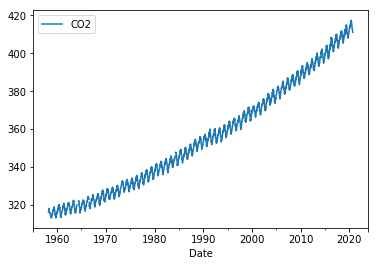

In [14]:
df.plot('Date', 'CO2')

Un graphique sur une période plus réduite permet de mieux observer le phénomène saisonnier.

Il semble que le point bas du phénomène saisonnier se situe vers le mois d'octobre et son haut vers le mois de mai.

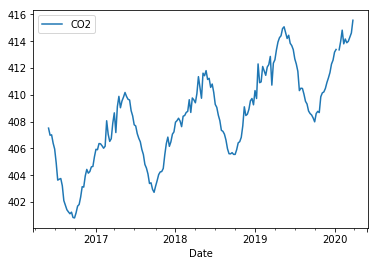

In [15]:
df[-500:-300].plot('Date', 'CO2')

On observe l'absence de données sur certaines périodes.

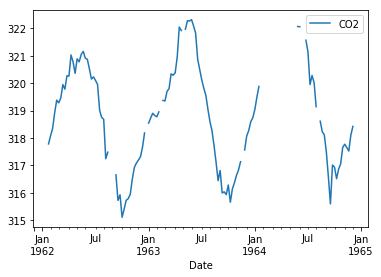

In [16]:
df[200:350].plot('Date', 'CO2')

## Elaboration d'un modèle prévisionnel de la tendance de long terme

Nous nous proposons de tenter d'approcher cette courbe par un polynôme du second degré. L'ajustement du polynôme sera réalisé en minimisant la somme du carré des écarts. Cela devrait placer la courbe résultante comme la position moyenne du phénomène. On note un écart significatif entre la dynamique de la tendance de long terme et celle du phénomène saisonnier. Les deux parties du phénomène devraient donc pouvoir être correctement séparées. La tendance de long terme devrait pouvoir être approchée par un polynôme du second degré.

Toutefois, le data frame contient de nombreuses données manquantes ('NaN'). La présence de ces données manquantes pose problème à l'algorithme d'ajustement du polynôme. Il faut donc limiter l'ajustement à la période de mesure disponible (indice 0 à 3261, cf. ci-dessous). Pour les données manquantes à l'intérieur de cette période, nous utiliserons une interpolation linéaire qui ne devrait trop affecter le résultat final.

In [17]:
df[3258:3266]

Date  Week     CO2
3258 2020-09-05    36  411.55
3259 2020-09-12    37  411.45
3260 2020-09-19    38  411.17
3261 2020-09-26    39  411.06
3262 2020-10-03    40     NaN
3263 2020-10-10    41     NaN
3264 2020-10-17    42     NaN
3265 2020-10-24    43     NaN

On observe que les données manquantes à l'intérieur de la période de mesure sont maintenant renseignées.

In [18]:
df_lt = df[0:3261]
df_lt = df_lt.interpolate()

In [19]:
df_lt[4:16]

Date  Week         CO2
4  1958-04-26    17  316.480000
5  1958-05-03    18  316.950000
6  1958-05-10    19  317.255000
7  1958-05-17    20  317.560000
8  1958-05-24    21  317.990000
9  1958-05-31    22  317.633333
10 1958-06-07    23  317.276667
11 1958-06-14    24  316.920000
12 1958-06-21    25  316.563333
13 1958-06-28    26  316.206667
14 1958-07-05    27  315.850000
15 1958-07-12    28  315.850000

Nous nous proposons de tenter d'approcher cette courbe par un polynôme du second degré.

In [20]:
p = np.polyfit(df_lt.index, df_lt['CO2'], deg=2, full=False)
p

array([4.83541627e-06, 1.45158071e-02, 3.14685628e+02])

Avec ces éléments, nous définissons une fonction qui pour un index donné, retourne une valeur de concentration en CO2 pour la tendance de long terme.

In [21]:
def taux_lt(x):
    return np.polyval(p, x)

Nous calculons maintenant le taux prévisionnel de long terme pour l'ensemble des index du data frame. Enfin, nous associons ces données au data frame "df".

In [22]:
prév_lt = []
for cpt in range(df.index.min(), df.index.max()+1):
    prév_lt.append(taux_lt(cpt))

df = df.assign(Prév_LT = prév_lt)

In [23]:
df.head()

Date  Week     CO2     Prév_LT
0 1958-03-29    13  316.19  314.685628
1 1958-04-05    14  317.31  314.700149
2 1958-04-12    15  317.69  314.714679
3 1958-04-19    16  317.58  314.729219
4 1958-04-26    17  316.48  314.743769

In [24]:
df.tail()

Date  Week  CO2     Prév_LT
3531 2025-11-29    48  NaN  426.228725
3532 2025-12-06    49  NaN  426.277393
3533 2025-12-13    50  NaN  426.326071
3534 2025-12-20    51  NaN  426.374759
3535 2025-12-27    52  NaN  426.423456

Nous pouvons tracer quelques graphiques pour observer la tendance de long terme qui a été évaluée. La tendance évaluée semble correctement coller au phénomène.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


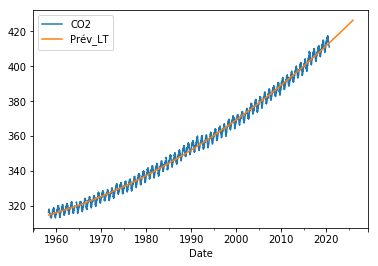

In [25]:
df.plot('Date', ['CO2', 'Prév_LT'])

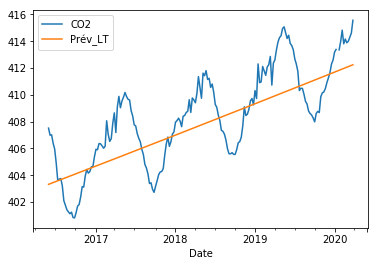

In [26]:
df[-500:-300].plot('Date', ['CO2', 'Prév_LT'])

## Observation du phénomène saisonnier

Pour séparer le phénomène saisonnier de la tendance de long terme, nous calculons la différence entre les mesures de CO2 et la tendance de long terme précédemment évaluée.

In [27]:
df = df.assign(Saisonnier = df['CO2'] - df['Prév_LT'])
df.head()

Date  Week     CO2     Prév_LT  Saisonnier
0 1958-03-29    13  316.19  314.685628    1.504372
1 1958-04-05    14  317.31  314.700149    2.609851
2 1958-04-12    15  317.69  314.714679    2.975321
3 1958-04-19    16  317.58  314.729219    2.850781
4 1958-04-26    17  316.48  314.743769    1.736231

Quelques graphiques pour observer le phénomène saisonnier. Le calcul de la moyenne sur la partie saisonnière devrait être proche de 0, si tout va bien. Ce qui semble être le cas.

On notera toutefois une sorte de pseudo période avec ce qui semble être des pics vers 1960, 1990 et 2020.

In [28]:
df['Saisonnier'].mean()

-0.01077814129813126

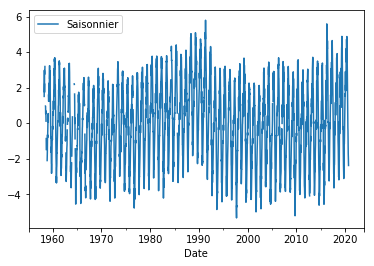

In [29]:
df.plot('Date', ['Saisonnier'])

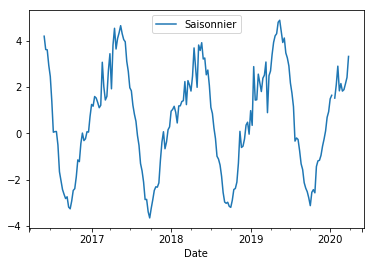

In [30]:
df[-500:-300].plot('Date', ['Saisonnier'])

## Evaluation du phénomène saisonnier moyen depuis 1958

Nous avons observé que le phénomène saisonnier atteint un pic minimum vers le premier octobre et un point haut vers le mois de mai. Nous avons également observé que de nombreuses semaines de relevés sont manquantes.

Une manière d'aborder le phénomène sans trop se préoccuper ni de son phasage dans l'année ni des données manquantes, serait de calculer la valeur moyenne de la partie saisonnière en fonction de la position de la semaine dans l'année. Cela permettrait d'utiliser au mieux les données disponibles. Une moyenne sur de nombreuses annèes de devrait pas être sensiblement affecter par l'absence de quelques données.

Cela permettrait de raffiner les prévisions ultérieures.

Pour cela, on construit un tableau qui va permettre, pour chaque numéro de semaine de l'année, de cumuler la part saisonnière du taux de CO2 ainsi que le nombre de valeurs considérées. Il suffira ensuite de calculer la valeur moyenne observée pour chacune des semaines.

In [31]:
# Parcourir le tableau.
# Pour chaque date, calculer la position de la semaine dans l'année.
# Ajouter la valeur du CO2_Saisonnier dans le tableau de résultats et incrémenter le nombre de valeurs
#     disponibles pour ce numéro de semaine.

année = [] # Créer le tableau de résultats.
for i in range (0, 55):
    # La première information est le numéro de semaine,
    #  le second, le cumul de taux, le troisième le nombre de valeurs cumulées.
    # Le quatrième contient la moyenne calculée.
    année.append([i, 0.0, 0, 0.0])
    
for cpt in range(df.index.min(), df.index.max()):
    # Récupérer les informations.
    sem = df.at[cpt, 'Week']
    taux_w = df.at[cpt, 'Saisonnier']
    if pd.isna(taux_w):
        pass
    else:
        année[sem][1] = année[sem][1] +  df.at[cpt, 'Saisonnier']
        année[sem][2] = année[sem][2] + 1

for i in range (0, 55): # Calculer la moyenne pour chaque semaine.
    if année[i][2] != 0:
        année[i][3] = année[i][1] / année[i][2]    

On affiche le tableau résultant afin de vérifier que toutes les semaines ont été correctement traitées et que le nombre des données est suffisant pour que la moyenne ait un sens (de même que l'approche proposée).

In [32]:
sem = pd.DataFrame(année[1:54], columns=['Num_semaine', 'Cumul', 'Nbre_valeurs', 'Moyenne_semaine'])
sem

Num_semaine       Cumul  Nbre_valeurs  Moyenne_semaine
0             1  -10.435116            62        -0.168308
1             2   -0.433861            62        -0.006998
2             3   10.883325            60         0.181389
3             4   18.412093            59         0.312069
4             5   27.679068            61         0.453755
5             6   32.803158            59         0.555986
6             7   44.930523            59         0.761534
7             8   51.803820            60         0.863397
8             9   61.016571            60         1.016943
9            10   69.198742            60         1.153312
10           11   86.623840            59         1.468201
11           12  101.870964            61         1.670016
12           13  124.475283            61         2.040578
13           14  145.750013            61         2.389344
14           15  153.384154            61         2.514494
15           16  167.767704            61         2.750290
16           17  177.032279            62         2.855359
17           18  178.875935            61         2.932392
18           19  186.693953            61         3.060557
19           20  191.224544            62         3.084267
20           21  188.647433            62         3.042701
21           22  175.434397            61         2.875974
22           23  162.293974            62         2.617645
23           24  138.385324            60         2.306422
24           25  121.343508            61         1.989238
25           26  101.233399            61         1.659564
26           27   80.422833            63         1.276553
27           28   50.741402            62         0.818410
28           29   16.750510            62         0.270170
29           30   -4.020982            62        -0.064855
30           31  -38.450604            62        -0.620171
31           32  -66.750360            62        -1.076619
32           33  -97.594420            62        -1.574104
33           34 -127.320249            61        -2.087217
34           35 -154.809353            62        -2.496925
35           36 -179.066463            62        -2.888169
36           37 -192.027702            62        -3.097221
37           38 -215.958033            62        -3.483194
38           39 -219.178964            62        -3.535145
39           40 -210.421279            60        -3.507021
40           41 -196.892379            59        -3.337159
41           42 -186.714647            60        -3.111911
42           43 -182.562318            61        -2.992825
43           44 -158.112100            60        -2.635202
44           45 -144.143658            62        -2.324898
45           46 -121.587501            62        -1.961089
46           47 -102.093350            61        -1.673661
47           48  -89.766985            62        -1.447855
48           49  -71.422626            62        -1.151978
49           50  -55.468867            62        -0.894659
50           51  -42.795708            62        -0.690253
51           52  -27.530202            61        -0.451315
52           53   -4.503293            11        -0.409390

Nous pouvons donc éventuellement envisager de compléter les données manquantes dans les mesures en utilisant ce tableau.

On peut afficher la courbe résultante sur le cycle annuel.

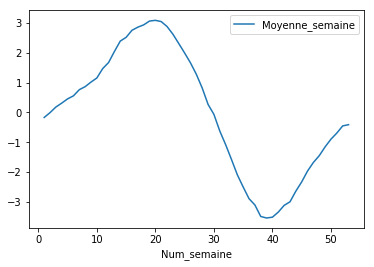

In [33]:
sem.plot('Num_semaine', 'Moyenne_semaine')

## Elaboration d'un modèle prévisionnel du cycle annuel

Nous allons tenter d'approcher le cycle annuel moyen par un polynôme de degré 7. Le résultat semble correct après quelques essais effectués avec des polynômes de degré inférieur.

In [34]:
p = np.polyfit(sem['Num_semaine'], sem['Moyenne_semaine'], deg=7, full=False)

In [35]:
def taux_semaine(x):
    return np.polyval(p, x)

Calculer une année de prévision saisonnière.

In [36]:
prév_sem = []
for cpt in range(sem.index.min()+1, sem.index.max()+2):
    prév_sem.append(taux_semaine(cpt))

Afficher le plot. Le phénomène saisonnier moyen est affiché avec le modèle de prévision proposé. Le résultat semble correct.

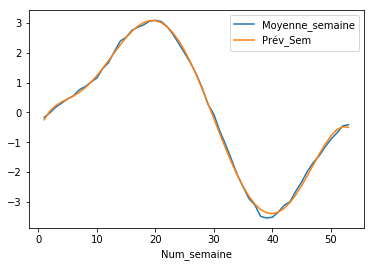

In [37]:
sem = sem.assign(Prév_Sem = prév_sem)
sem.plot('Num_semaine', ['Moyenne_semaine', 'Prév_Sem'])

Nous disposons donc d'un modèle de prévision du phénomène saisonnier.

## Comparaison entre les mesures et les prévisions du modèle

Nous calculons pour chaque date du data frame "df", la part saisonnière du taux de CO2 en fonction du numéro de semaine, en utilisant le data frame "sem". Puis nous ajoutons la colonne correspondante au data frame "df".

In [38]:
prév_sem = []
for cpt in range(df.index.min(), df.index.max()+1):
    w = df.at[cpt, 'Week']
    prév_sem.append(sem.at[w-1, 'Moyenne_semaine'])
df = df.assign(Prév_Sem = prév_sem)

Nous pouvons maintenant calculer la somme des contributions saisonnière et long terme et ajouter la colonne correspondante au data frame "df".

In [39]:
df = df.assign(Prév_total = df['Prév_LT'] + df['Prév_Sem'])

Nous pouvons maintenant afficher quelques graphiques pour comparer un peu les données mesurées avec les données issues de la prévision.

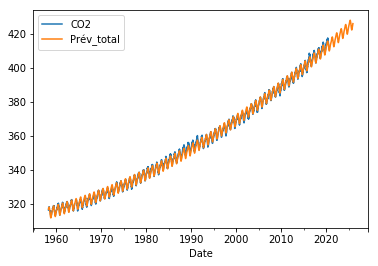

In [40]:
df.plot('Date', ['CO2', 'Prév_total'])

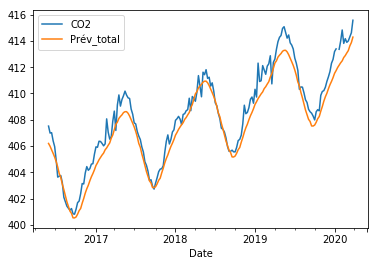

In [41]:
df[-500:-300].plot('Date', ['CO2', 'Prév_total'])

Nous calculons l'écart entre les mesures et les prévisions lorsque cela a un sens (hors valeurs 'NaN').

In [42]:
Tab_écart_prév = []
for cpt in range(df.index.min(), df.index.max()):
    # Récupérer les informations.
    Ecart_prév = df.at[cpt, 'CO2'] - df.at[cpt, 'Prév_total']
    if pd.isna(Ecart_prév):
        pass
    else:
        Tab_écart_prév.append(Ecart_prév)
df_écart_prév = pd.DataFrame(Tab_écart_prév)

Nous affichons un histogramme afin d'évaluer l'ampleur des erreurs. L'hitogramme ne semble pas être tout à fait une gaussienne. On note cependant que la majorité des erreurs sont proches de 0. La gamme des écarts de prévision vont de -2ppm à +3ppm environ. Les erreurs les plus importantes sont en faible nombre. Pour une valeur de taux de CO2 qui est autour de 300ppm au moins, ces erreurs ne représentent que 1% environ.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6253158630>]],
      dtype=object)

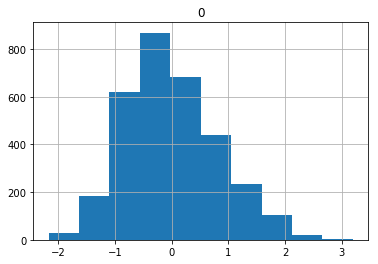

In [43]:
df_écart_prév.hist()

## Prévisions pour l'année 2025

Nous pouvons maintenant établir notre prévision pour l'année 2025. Commençons par afficher le graphique correspondant.

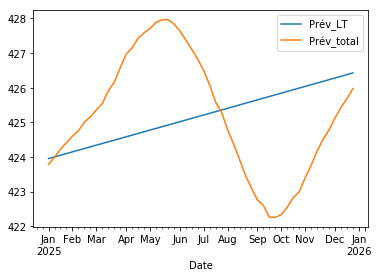

In [44]:
df[-52:].plot('Date', ['Prév_LT', 'Prév_total'])

On observe un taux moyen annuel (lié à la tendance long terme, choisie au début du mois de juillet), de l'ordre de 425.5ppm. Avec un minimum annuel de 422ppm et un maximum de l'ordre de 428ppm.

Recherchons les valeurs numériques plus précisément.

In [45]:
moy2025 = round(df[-52:]['Prév_total'].mean(), 2)
min2025 = round(df[-52:]['Prév_total'].min(), 2)
max2025 = round(df[-52:]['Prév_total'].max(), 2)
print(f"Le taux moyen de CO2 prévu pour l'année 2025 est de {moy2025}ppm, avec un minimum de {min2025}ppm et un maximum de {max2025}ppm." )

Le taux moyen de CO2 prévu pour l'année 2025 est de 425.18ppm, avec un minimum de 422.26ppm et un maximum de 427.96ppm.
